# Capstone Project 1: MuscleHub AB Test

- Name: Petr Vlasak


- Email: petr.vlasakk@gmail.com


- GitHub: https://github.com/pvlasak

------------------------------------

In this project a special Codecademy library is used which allows to type SQL Commands directly into Jupyter Notebook. Function is called sql_query and takes SQL query as an argument. Each query will return a Pandas DataFrame.

In [1]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

# Initial Check of Data Sets

The sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

## Available Data sets

Suppose that two groups of customers are defined based on the fact, if they took a fitness test or not. 
 - Group A: customers, who were given a fitness test
 - Group B: customer, who were not given a fitness test
 

SQLite database contains several tables:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.


## Visulalisation of "visits" data set:

In [3]:
# Examine visits here
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


## Visulalisation of "fitness_tests" data set:

In [4]:
# Examine fitness_tests here
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


## Visulalisation of "applications" data set:

In [5]:
# Examine applications here
sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


## Visulalisation of "purchases" data set:

In [6]:
# Examine purchases here
sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


## Preparation of Pandas Dataframe 

Data have been combined by sequence of SQL commands, joined based on "first_name", "last_name" and "email" and only entries after date of 7-1-17 have been selected. 

All data are save as Pandas Dataframe named "df". 

In [7]:
df = sql_query('''
SELECT
   base.*,
   fitness_t.fitness_test_date,
   applications_t.application_date,
   purchases_t.purchase_date
FROM 
    (SELECT 
        v.first_name,
        v.last_name, 
        v.gender,
        v.email, 
        v.visit_date
    FROM visits v
    ) base
LEFT JOIN (
    SELECT   
        fitness_tests.first_name, 
        fitness_tests.last_name, 
        fitness_tests.email,
        fitness_tests.fitness_test_date
    FROM fitness_tests
    ) fitness_t
ON base.first_name = fitness_t.first_name
AND base.last_name = fitness_t.last_name
AND base.email = fitness_t.email
LEFT JOIN (
    SELECT 
        applications.first_name, 
        applications.last_name, 
        applications.email,
        applications.application_date
    FROM applications
    ) applications_t
ON base.first_name = applications_t.first_name
AND base.last_name = applications_t.last_name
AND base.email = applications_t.email
LEFT JOIN (
    SELECT 
        purchases.first_name, 
        purchases.last_name, 
        purchases.email,
        purchases.purchase_date
    FROM purchases
    ) purchases_t
ON base.first_name = purchases_t.first_name
AND base.last_name = purchases_t.last_name
AND base.email = purchases_t.email
WHERE base.visit_date >= '7-1-17'
ORDER BY base.visit_date ASC
''')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None


# Hypotesis Testing 

## Investigation of the A and B groups

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

New column "ab_test_group" is created that contains value `A` if value in `fitness_test_date` is not `None` and `B` if is `None`. 


In [9]:
df["ab_test_group"] = df.fitness_test_date.apply(lambda x: "A" if pd.notnull(x) else "B")

Number of users for both groups A and B is counted: 

In [10]:
ab_counts = df.assign(count_of_users = 1).groupby("ab_test_group").count()[["count_of_users"]].reset_index()
ab_counts.head()

,ab_test_group,count_of_users
0,A,2504
1,B,2500


Number of user for each group is visualised like a pie chart:

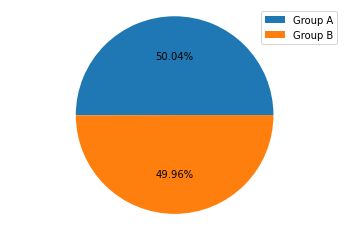

In [11]:
ax = plt.subplots(1,1)
plt.pie(ab_counts.count_of_users.values, autopct='%0.2f%%')
plt.axis('equal')
plt.legend(labels = ["Group A", "Group B"])
plt.savefig("ab_test_pie_chart.png")
plt.show()

**Number of users in each group is almost equal**

## Who picks up an application?

New column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [12]:
df["is_application"] = df.application_date.apply(lambda x: "Application" if pd.notnull(x) else "No Application") 

New DataFrame named as `app_counts` is saved that contains the amount of users that either do or don't pick up application in each group A and B.  

In [13]:
app_counts = df.assign(application_counts = 1).groupby(["ab_test_group", "is_application"]).count()[["application_counts"]].reset_index()
#app_counts.pivot(index = "ab_test_group", columns = "is_application", values= "application_counts")

In [14]:
app_pivot = app_counts.pivot(index = "ab_test_group", columns = "is_application", values= "application_counts").reset_index()

A new column called `Total`, which is the sum of `Application` and `No Application` is defined.

In [15]:
app_pivot["Total"] = app_pivot["Application"] + app_pivot["No Application"] 

A new column called `Percent with Application`, which is equal to `Application` divided by `Total` is defined.

In [16]:
app_pivot["Percent with Application"] = app_pivot.Application / app_pivot.Total
app_pivot.head()

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


Higher percentage of customers in group B turned in an application. 

### Chi Square Test 

This type of test can help us to identify if the probabily of picking up an application depends on categorical variable - Group A or B.

In [17]:
from scipy.stats import chi2_contingency
contingency = [[250, 2254],
               [325, 2175]]
_, pvalue_chi2, _, _ = chi2_contingency(contingency)
print("P-value for conducted Chi Square test is: {}".format(pvalue_chi2.round(5)))

P-value for conducted Chi Square test is: 0.00096


P-value is below a threshold of 0.05 and null hypotesis can be rejeted. There is a statistically significant association between the given fitness test and filled out application. E.g. two groups A and B appear to have different probabilities of filling out an application. 

**I can conclude that the customers from B-group are more likely to pick up an application**

## Who purchases a membership from those who picked up application?

A column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [18]:
df[["is_member"]] = df.purchase_date.apply(lambda x: "Member" if pd.notnull(x) else "Not Member")

A new DataFrame called `just_apps` the contains only people who picked up an application is created.

In [19]:
just_apps = df[df.application_date.notnull()]
just_apps.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,male,SCardenas1980@gmail.com,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,female,VMunoz1998@gmail.com,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,male,MB9820@gmail.com,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member


New dataframe includes number of customers that purchased or not purchased membership after they picked up an application. It shows total number of customer and percentage of membership purchase for both groups. 

In [20]:
member_pivot = (just_apps.groupby(["is_member", "ab_test_group"]).count()[["is_application"]].reset_index()
                 .pivot(index = "ab_test_group", columns = "is_member" , values = "is_application")
                 .reset_index()
                )
member_pivot["Total"] = member_pivot["Member"] + member_pivot["Not Member"]
member_pivot["Percent Purchase"] = member_pivot["Member"] / member_pivot["Total"]
member_pivot.head()

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


Percentage value shows that the customers from Group A are more likely to purchase membership if they pick up an application. 
Another Chi-Square Test is important to be conducted to check if the difference in purchase for those two groups is statistically significant. 

### Chi Square Test 

In [21]:
from scipy.stats import chi2_contingency
contingency = [[200, 50],
               [250, 75]]
_, pvalue_chi2, _, _ = chi2_contingency(contingency)
print("P-value for conducted Chi Square test is: {}".format(pvalue_chi2.round(5)))

P-value for conducted Chi Square test is: 0.43259


The p-value is higher than 0.05 and the null hypotesis therefore can't be rejected. It means there is statistically no significant association between the fitness test taken (group A and group B) and the purchase of membership **if application is picked up**. 

Therefore the difference found previously is not significant and there is not high probability that people from group A will purchase membership than people from group B if application is already picked up. 

## Who purchases a membership from all visitors?

New dataframe takes into account all customers and counts the amount of membership purchase for both group, including percentage value. 

In [22]:
final_member_pivot = (df.groupby(["is_member", "ab_test_group"]).count()[["is_application"]].reset_index()
                 .pivot(index = "ab_test_group", columns = "is_member" , values = "is_application")
                 .reset_index()
                )
final_member_pivot["Total"] = final_member_pivot["Member"] + final_member_pivot["Not Member"]
final_member_pivot["Percent Purchase"] = final_member_pivot["Member"] / final_member_pivot["Total"]
final_member_pivot.head()
                     

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Previously, only people who had **already picked up an application** were considered, it shows there was no significant difference in membership between Group A and Group B.

Now, all people who **visit MuscleHub** are considered, there might be a significant difference in purchase of membership between Group A and Group B. 

### Chi Square Test

In [23]:
from scipy.stats import chi2_contingency
contingency = [[200, 2304],
               [250, 2250]]
_, pvalue_chi2, _, _ = chi2_contingency(contingency)
print("P-value for conducted Chi Square test is: {}".format(pvalue_chi2.round(5)))

P-value for conducted Chi Square test is: 0.01472


Based on resultant p-value the null hypotesis has to be rejected because there is a statistically significant difference in purchased membership for those two groups A and B (there is a significant association between taken fitness test and membership purchase)

**Customers from Group B are more likely to purchase membership**

# Visualisation of difference between Group A and B

## Percent of visitors who apply

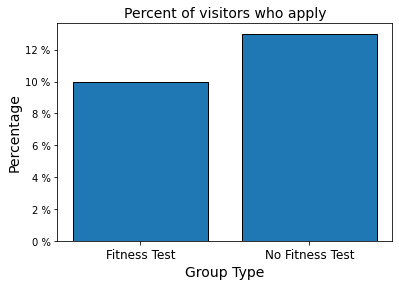

In [33]:
import numpy as np
ax = plt.subplot()
data_bar_app = app_pivot["Percent with Application"].values
x_bar_position = [0,1]
x_ticks = (0,1)
y_ticks = np.linspace(0, 0.12, 7)
plt.bar(x_bar_position, data_bar_app, edgecolor = 'black')
plt.xticks(x_ticks, labels = ["Fitness Test", "No Fitness Test"], fontsize = 12)
plt.yticks(y_ticks, labels = ["0 %", "2 %", "4 %", "6 %", "8 %", "10 %", "12 %"])
ax.set_xlabel("Group Type", fontsize = 14)
ax.set_ylabel("Percentage", fontsize = 14)
ax.set_title("Percent of visitors who apply", fontsize = 14)
plt.show()

## Percent of applicants who purchase a membership

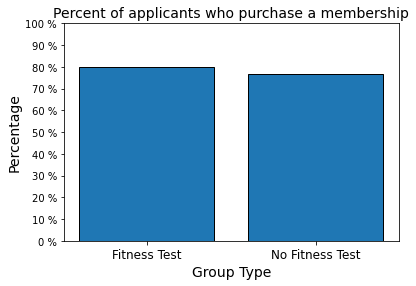

In [32]:
ax = plt.subplot()
data_bar_purch = member_pivot["Percent Purchase"].values
x_bar_position = [0,1]
x_ticks = (0,1)
y_ticks = np.linspace(0, 1.0, 11)
plt.bar(x_bar_position, data_bar_purch, edgecolor = 'black')
plt.xticks(x_ticks, labels = ["Fitness Test", "No Fitness Test"], fontsize = 12)
plt.yticks(y_ticks, labels = ["0 %", "10 %", "20 %", "30 %", "40 %", "50 %", "60 %", "70 %", "80 %", "90 %", "100 %"])
plt.yticks(y_ticks)
ax.set_xlabel("Group Type", fontsize = 14)
ax.set_ylabel("Percentage", fontsize = 14)
ax.set_title("Percent of applicants who purchase a membership", fontsize = 14)
plt.show()

## Percent of visitors who purchase a membership

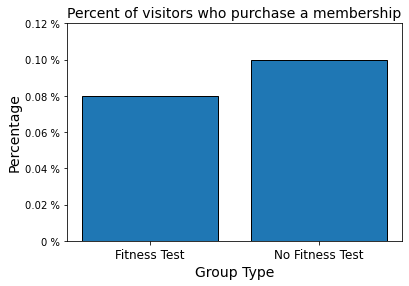

In [31]:
ax = plt.subplot()
data_bar_purch_all = final_member_pivot["Percent Purchase"].values
x_bar_position = [0,1]
x_ticks = (0,1)
y_ticks = np.linspace(0, 0.12, 7)
plt.bar(x_bar_position, data_bar_purch_all, edgecolor = 'black')
plt.xticks(x_ticks, labels = ["Fitness Test", "No Fitness Test"], fontsize = 12)
plt.yticks(y_ticks, labels = ["0 %", "0.02 %", "0.04 %", "0.06 %", "0.08 %", "0.10 %", "0.12 %"])
#plt.yticks(y_ticks)
ax.set_xlabel("Group Type", fontsize = 14)
ax.set_ylabel("Percentage", fontsize = 14)
ax.set_title("Percent of visitors who purchase a membership", fontsize = 14)
plt.show()

# Conclusion

1. Bar chart plots show that the people from category B are more likely to fill out an application and purchase membership.


2. The difference described in previous point is found to be statistically significant, which means there is a significant association between categorical value and percentage of picked up applications and purchased memberships. 


3. The difference between percentage of purchased memberships is not statistically significant if only customers with filled out application are taken into account.  


**4. Taking a fitness test with a personal trainer can reduce the amount of customers who finally purchase a membership. Therefore is recommended to skip the first step in the application process and offer a fitness test as an additional service to MuscleHub customers** 
